___________________________From Scratch___________________________
Input X coordinate
6
Enter Y coordinate 
6
(6, 6)
Size of array : 6
Choosen value of K :  3
[(2.0, 0), (2.0, 0), (2.8284271247461903, 1), (4.0, 1), (4.47213595499958, 0), (4.47213595499958, 0)]
Point (6, 6) belongs to Negative class
[(2.0, 0), (2.0, 0), (2.8284271247461903, 1), (4.0, 1), (4.47213595499958, 0), (4.47213595499958, 0)]
0
___________________________Using Lyb Function___________________________

   x  y     class
0  2  4  negative
1  4  6  negative
2  4  4  positive
3  4  2  negative
4  6  4  negative
5  6  2  positive
[[2 4]
 [4 6]
 [4 4]
 [4 2]
 [6 4]
 [6 2]]
['negative' 'negative' 'positive' 'negative' 'negative' 'positive']
General KNN ['negative']
Distance Weighted KNN ['negative']


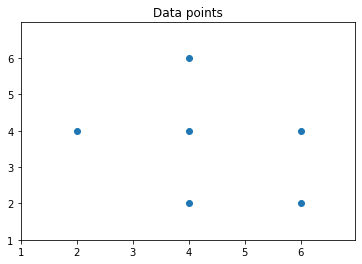

In [27]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

class fromScratch:
    def __init__(self):
        
        print('___________________________From Scratch___________________________\n')
        self.x=np.array([[2,4],[4,2],[4,4],[4,6],[6,2],[6,4]])
        self.y=np.array([0,0,1,0,1,0])  #  0=negative 1=positive class
        
    def eucledian_distance(self,x1,y1,x2,y2):
        return math.sqrt((x1-x2)**2+(y1-y2)**2)
    
    def chooseK(self,arr):
        print("Size of array :",arr.shape[0])
        k=round(math.sqrt(arr.shape[0]))
        if(k%2==0):
            k=k+1
        #k should be odd so that classfication can be done properly(No chance of 50%-50% classification)
        print("Choosen value of K : ",k)
        return k
    
    def classifyPoint(self,x,y,point,k):
        inputSize=x.shape[0]
        distance=[] #for string eucledian distance
        for i in range(inputSize):
            distance.append(self.eucledian_distance(point[0],point[1],x[i][0],x[i][1]));

        mergedList=list(zip(distance,y))
        mergedList.sort() #sort according to increasing distance
        print(mergedList)
        freq0=0 #Freq of group 0 (negative)
        freq1=0 #Freq of group 1 (positive)

        for i in range(k): #Iterate for k neighbours
            if(mergedList[i][1]==0):
                freq0=freq0+1
            elif (mergedList[i][1]==1):
                freq1=freq1+1

        if(freq0>freq1):
            return 0
        else:
            return 1
        
    def main(self):
        print("Input X coordinate")
        x_co=int(input())
        print("Enter Y coordinate ")
        y_co=int(input())

        pointt=(x_co,y_co)
        print(pointt)
        
        k=self.chooseK(self.x)
        label="--"
        if(self.classifyPoint(self.x,self.y,point=pointt,k=k)==0):
            label="Negative"
        else:
            label:"Positive"
        print("Point {} belongs to {} class".format(pointt,label))
        print (self.classifyPoint(self.x,self.y,pointt,k))
        
class usingLyb:
    
    def __init__(self):
        print('___________________________Using Lyb Function___________________________\n')
        self.dataset=pd.read_csv("knn_dataset.csv")
        print(self.dataset)
        self.X=self.dataset.iloc[:,:-1].values
        print(self.X)
        self.y=self.dataset.iloc[:,2].values
        print(self.y)
    
    def main(self):
        from sklearn.neighbors import KNeighborsClassifier
        classifier=KNeighborsClassifier(n_neighbors=3)
        classifier.fit(self.X,self.y)
        X_test=np.array([6,6])
        y_pred=classifier.predict([X_test])
        print('General KNN',y_pred)
        '''
        n_neighborsint, optional (default = 5)
        Number of neighbors to use by default for kneighbors queries.

        weightsstr or callable, optional (default = ‘uniform’)
        weight function used in prediction. Possible values:

        ‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.

        ‘distance’ : weight points by the inverse of their distance. in this case, closer
        neighbors of a query point will have a greater influence than neighbors which are further away.

        [callable] : a user-defined function which accepts an array of distances, 
        and returns an array of the same shape containing the weights.
        
        '''

        classifier=KNeighborsClassifier(n_neighbors=3,weights='distance')
        classifier.fit(self.X,self.y)
        X_test=np.array([6,6])
        y_pred=classifier.predict([X_test])
        print('Distance Weighted KNN',y_pred)
        ######################################
        h = .02 
        x_min, x_max = self.X[:, 0].min() - 1, self.X[:, 0].max() + 1
        y_min, y_max = self.X[:, 1].min() - 1, self.X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        
        plt.figure()
        plt.scatter(self.X[:, 0], self.X[:, 1])
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.title("Data points")
        plt.show()
      
    
    
   
    
f=fromScratch()
f.main()

u=usingLyb()
u.main()
    